In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# EDA

## load the data

In [286]:
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [568]:
ultimate_data_challenge_df = pd.read_json('ultimate_data_challenge.json')
ultimate_data_challenge_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [288]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [289]:
logins_df.describe()

/var/folders/z3/37b1tph56lbflqsnd5zj_8lh0000gn/T/ipykernel_90446/1127183450.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


We see 3 clicks in a day. This is valuable information

In [290]:
logins_df.groupby(['login_time']).agg(click_times = ('login_time','count')).value_counts()

click_times
1              91397
2                859
3                  9
dtype: int64

We see that for majority of the days, there's only 1 click time per day. 

We have 2 click times in 859 days and 3 clicks in 9 days.

In [291]:
click_df = logins_df.groupby(['login_time']).agg(click_times = ('login_time','count')).reset_index()

click_times_is_3 = click_df[click_df['click_times'] == 3]
click_times_is_2 = click_df[click_df['click_times'] == 2]
click_times_is_1 = click_df[click_df['click_times'] == 1]

In [292]:
import datetime

click_times_is_3['month'] = click_times_is_3.login_time.dt.month
click_times_is_3['hour'] = click_times_is_3.login_time.dt.hour


click_times_is_2['month'] = click_times_is_2.login_time.dt.month
click_times_is_2['hour'] = click_times_is_2.login_time.dt.hour


click_times_is_1['month'] = click_times_is_1.login_time.dt.month
click_times_is_1['hour'] = click_times_is_1.login_time.dt.hour


/var/folders/z3/37b1tph56lbflqsnd5zj_8lh0000gn/T/ipykernel_90446/1446340000.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z3/37b1tph56lbflqsnd5zj_8lh0000gn/T/ipykernel_90446/1446340000.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z3/37b1tph56lbflqsnd5zj_8lh0000gn/T/ipykernel_90446/1446340000.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

For click time 1, it happens the most during march.

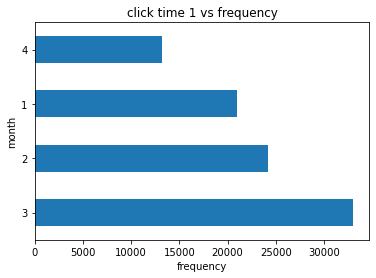

In [293]:
click_times_is_1.month.value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('month')
plt.title('click time 1 vs frequency')
plt.show()

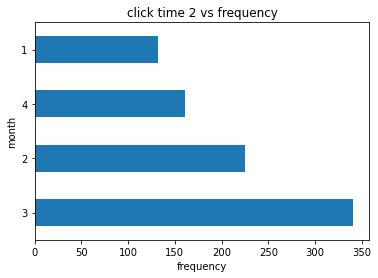

In [294]:
click_times_is_2.month.value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('month')
plt.title('click time 2 vs frequency')
plt.show()

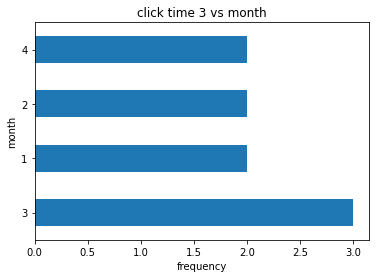

In [295]:
click_times_is_3.month.value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('month')
plt.title('click time 3 vs month')
plt.show()

Text(0.5, 1.0, '')

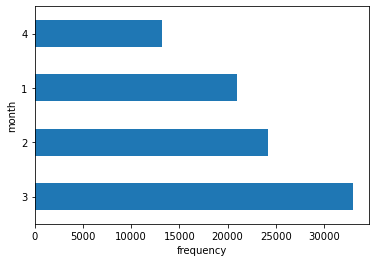

In [296]:
click_times_is_1.month.value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.ylabel('month')
plt.title('')

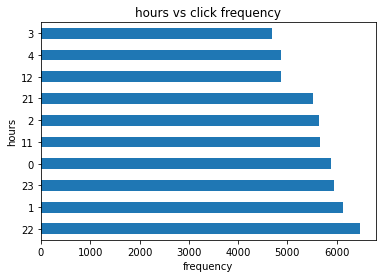

In [297]:
click_times_is_1.hour.value_counts().head(10).plot(kind='barh')
plt.ylabel('hours')
plt.xlabel('frequency')
plt.title('hours vs click frequency')
plt.show()

## Now let's see it through 15 minutes time interval. 

In [275]:
click_df.login_time.min()

Timestamp('1970-01-01 20:12:16')

In [276]:
click_df.login_time.max()

Timestamp('1970-04-13 18:57:38')

# 15 minute intervals

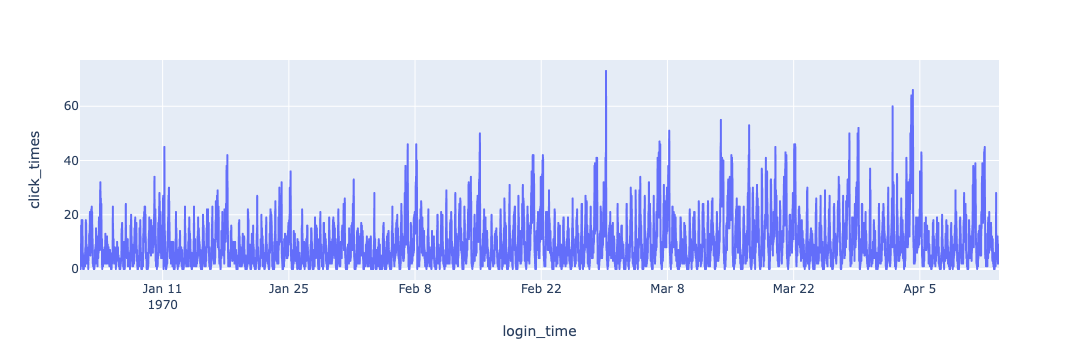

In [298]:
fig = px.line(click_time_details, x= 'login_time',y ='click_times')
fig.show()

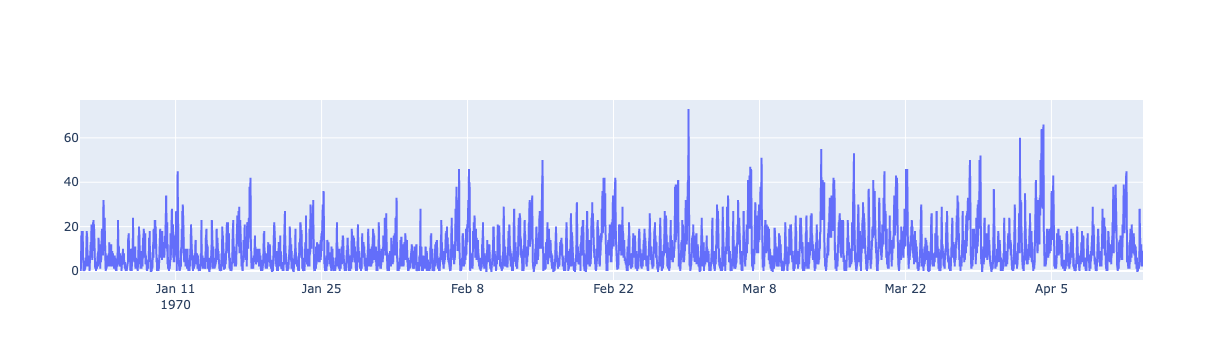

In [299]:
fig2 = go.Figure([go.Scatter(x=click_time_details['login_time'],y=click_time_details['click_times'])])
fig2.show()

In [303]:
click_time_details = click_df.set_index('login_time').resample('15min').sum().reset_index()
click_time_details

,login_time,click_times
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


## Find hourly trends by month

In [402]:
hourly_logins = click_df.set_index('login_time').resample('H').sum()

day_of_week = list(hourly_logins.index.dayofweek)
click_times = list(hourly_logins.click_times)
month = list(hourly_logins.index.month)

click_hours = list(hourly_logins.index.hour)

In [429]:
mean_clicks = hourly_logins['click_times'].mean()

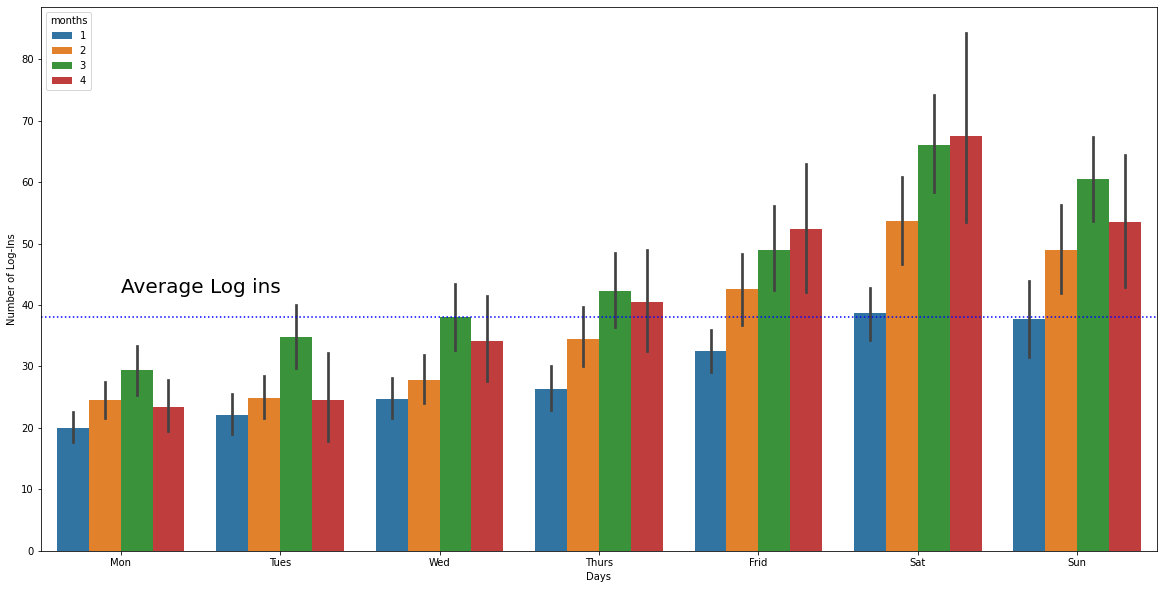

In [443]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x = day_of_week, y = click_times, hue = month)
ax.legend(title='months', loc='upper left')
ax.axhline(y = mean_clicks, color = 'b', linestyle = ':')
ax.set_ylabel('Number of Log-Ins')
ax.set_xlabel('Days')
ax.set_xticklabels(['Mon','Tues','Wed','Thurs','Frid','Sat','Sun'])
plt.annotate('Average Log ins', (1,38),(0,42), fontsize= 20)
plt.show()

# Average log ins throughout the whole day

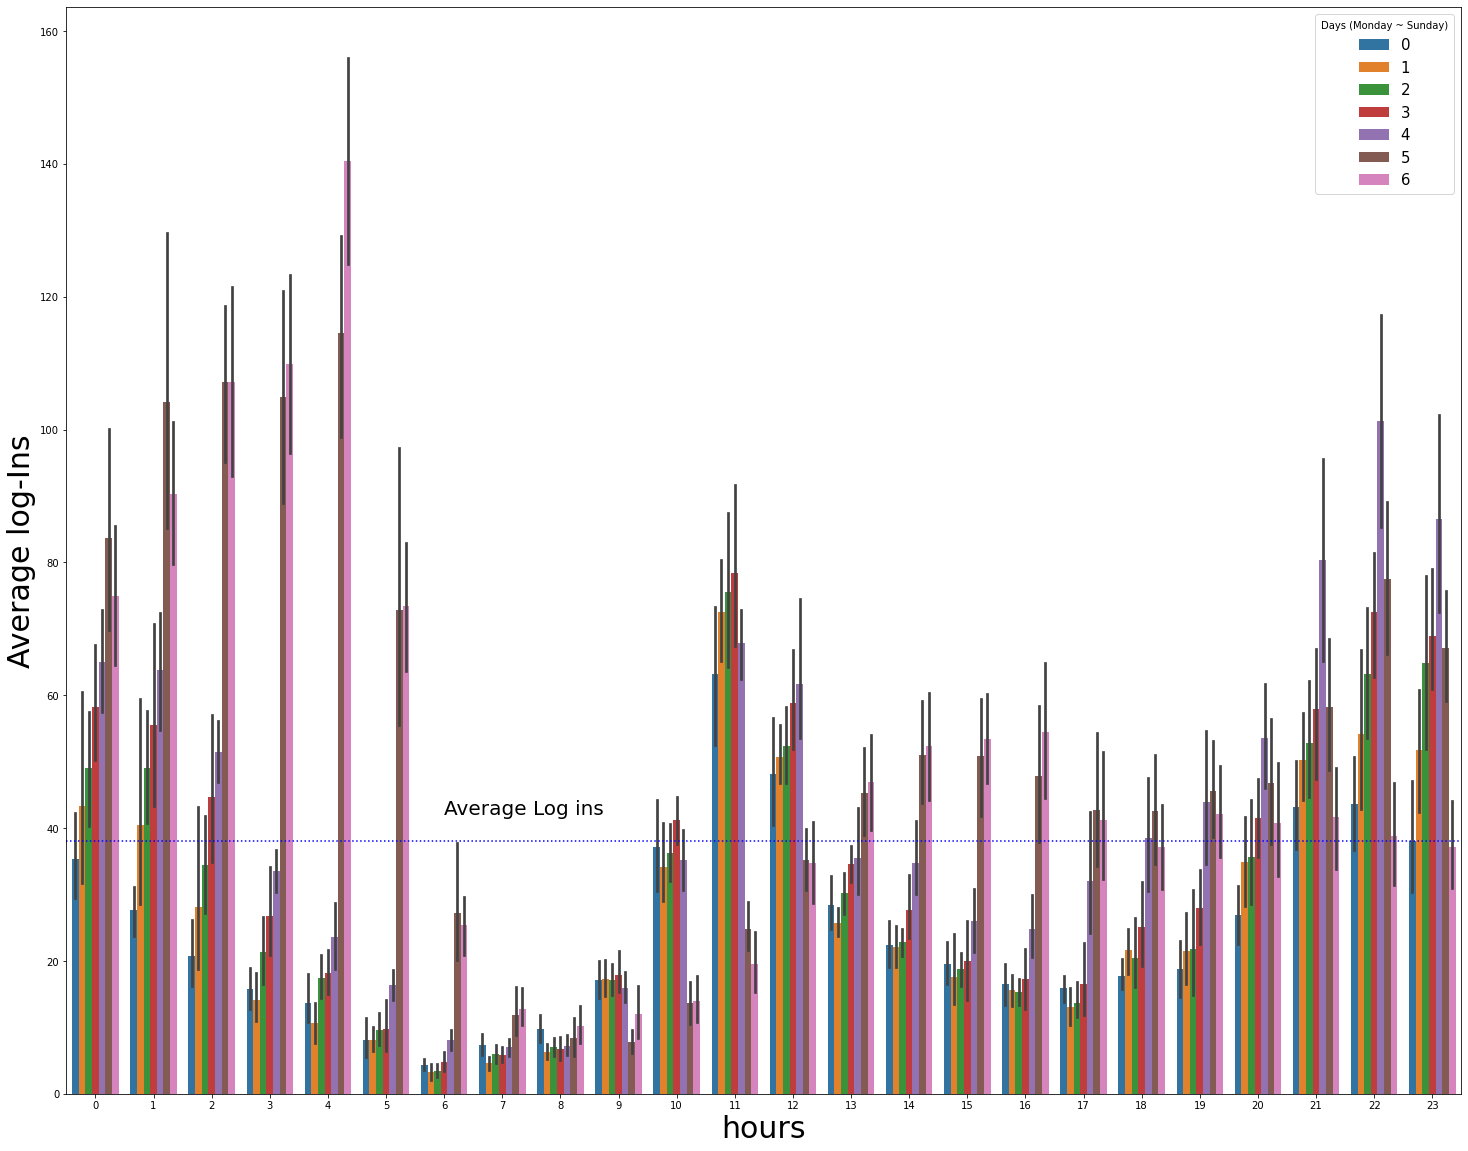

In [445]:
plt.figure(figsize=(25,20))
ax = sns.barplot(x = click_hours, y = click_times, hue = day_of_week)
ax.legend(title='Days (Monday ~ Sunday)', fontsize= 15)
ax.axhline(y = mean_clicks, color = 'b', linestyle = ':')
ax.set_ylabel('Average log-Ins', fontsize = 30)
ax.set_xlabel('hours', fontsize= 30)
plt.annotate('Average Log ins', (1,38),(6,42), fontsize= 20)
plt.show()

The bar graph tells us that saturday is the peak of log ins and as it moves toward sunday, there is an gradual increase. 

Around 12 ~ 4 am has the peak of log ins. Especially on saturday and sundays. 

During the morning or around the afternoon has small peaks (6am ~ 9am). 

# Experiment and metrics

1) 
• Days for rides 
• Weekday ride histories and Weekend ride histories before the toll bridge 
• Purchase for every ride before the toll
• Weekday ride histories and Weekend ride histories after the toll bridge 
• Purchase for every ride after the toll

2) 
Before we conduct the ANOVA test, we will choose two groups.

Gotham
H0 - No difference in average purchase(rides) before and after a month from reimbersment during night time. 
H1 - Increase in average purchase(rides) before and after a month from reimbersment during night time. 

Metropolis
H0 - No difference in average purchase(rides) before and after a month from reimbersment during day time. 
H1 - Increase in average purchase(rides) before and after a month from reimbersment during day time. 

• One tailed ANOVA test
    • To test if the average cost before the toll bridge and the average cost after the toll bridge to see if they are any statistical difference. 
    • It gives you a P value. 
        1. Null Hypothesis: There will be no difference in mean between groups before and after the toll bridge formation.
        2. Alternative Hypothesis: There will be increase in average price.
        2. Set the level of Significance(Criterion): p < 0.05
            • If p values less than 0.05, we reject the null hypothesis.
        3. Compute test Statistics: 
            • We create sample. 
        4. Get results
        
        

For the Z test, we will need the following two groups.
• Z test one tail
    • If we know the population standard deviation, then we can proceed with this test. 


Gotham
Ho -  No difference in mean cars during night a month before reimbursement and a month after reimbursement.
H1 -  Increase mean in cars during night a month before reimbursement and a month after reimbursement.

Metropolis
Ho -  No difference in mean cars during daytime a month before reimbursement and a month after reimbursement.
H1 -  Increase in average cars during night a month before reimbursement and a month after reimbursement.
    
I will choose the alhpa to be 0.05. If the p value is lower than alpha, then we will reject the null hypothesis and tell the manager to continue the reimbursement. 

I will choose the alpha to be 0.05 If the p value is higher than alpha, we fail to reject the null hypothesis. Then we would have to decrease the toll fee or figure something else to increase the partner driving between the two cities.

If the p value is mixed, only one hypothesis is >0.05, then the result is inconclusive.


# Predictive modeling

In [569]:
ultimate_data_challenge_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [570]:
ultimate_data_challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [571]:
ultimate_data_challenge_df['signup_date'] = pd.to_datetime(ultimate_data_challenge_df['signup_date'])
ultimate_data_challenge_df['last_trip_date'] = pd.to_datetime(ultimate_data_challenge_df['last_trip_date'])

In [572]:
ultimate_data_challenge_df['signup_date'].dtype

dtype('<M8[ns]')

In [573]:
ultimate_data_challenge_df['last_trip_date'].dtype

dtype('<M8[ns]')

In [574]:
ultimate_data_challenge_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [575]:
ultimate_data_challenge_df.shape

(50000, 12)

Phone has nothing to do with retention. So we can drop it or impute it with the most common phone.

In [576]:
ultimate_data_challenge_df['phone'].mode()

0    iPhone
Name: phone, dtype: object

In [577]:
ultimate_data_challenge_df['phone'].fillna('iPhone',inplace=True)

In [578]:
ultimate_data_challenge_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We don't care about drivers ratings of their trips. If rating is going to influence the ride, then customers ratings on drivers will have more influence on retention rate.

I am going to fill up the missing null value for avg_rating_of_driver column with mean.

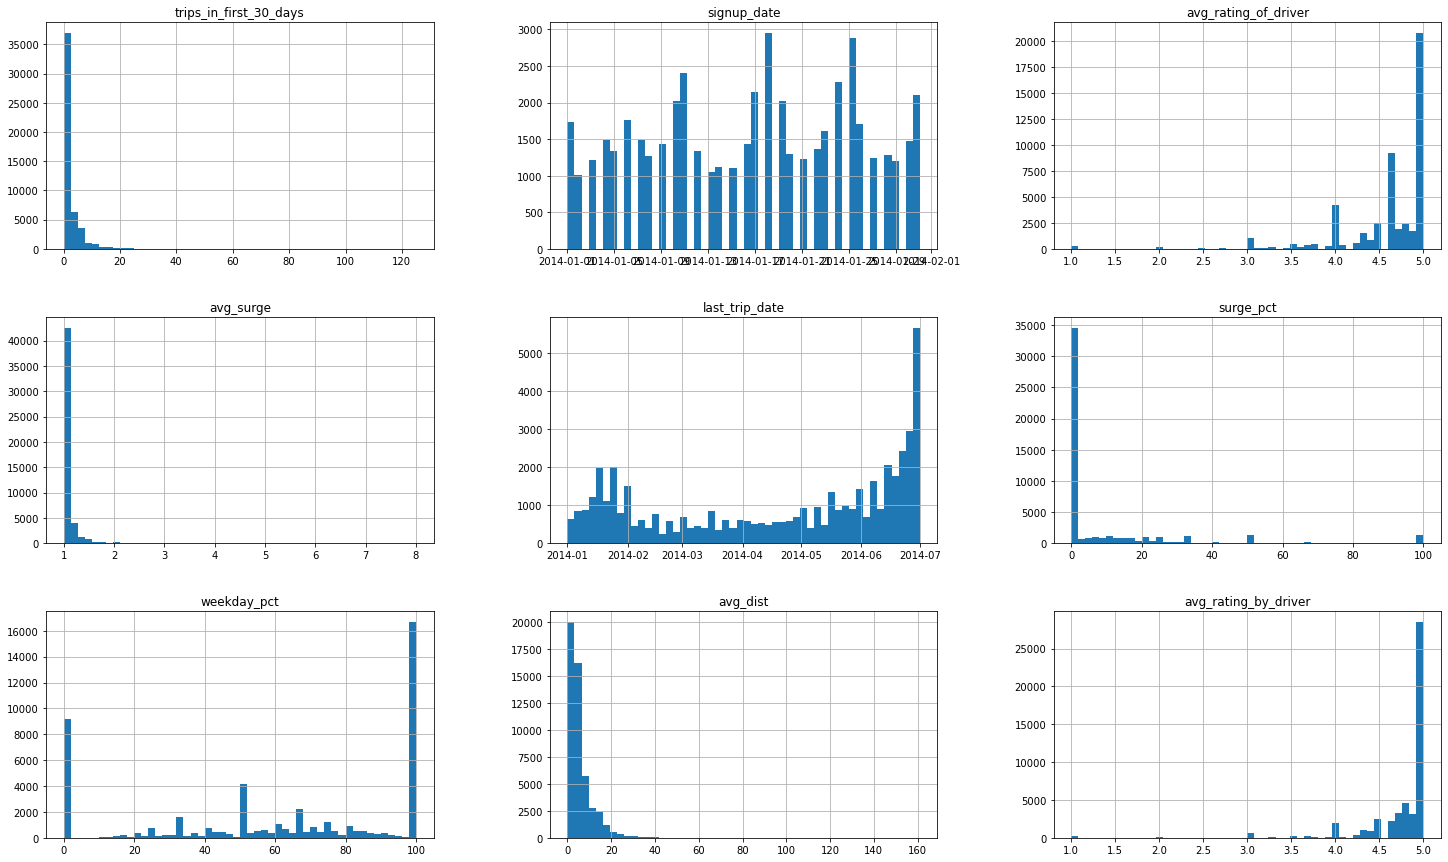

In [561]:
ultimate_data_challenge_df.hist(bins = 50, figsize=(25,15))
plt.show()

In [579]:
max_date = ultimate_data_challenge_df.last_trip_date.max()
cut_line = max_date - pd.Timedelta('30 days')
cut_line

Timestamp('2014-06-01 00:00:00')

In [580]:
ultimate_data_challenge_df['retained'] = np.where(ultimate_data_challenge_df.last_trip_date > cut_line, 'retained','not retained')

<AxesSubplot:>

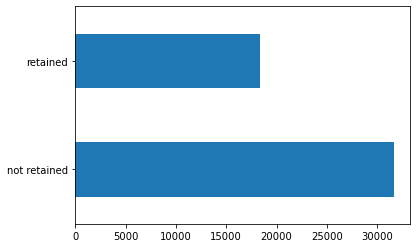

In [581]:
ultimate_data_challenge_df['retained'].value_counts().plot(kind='barh')

more unretained than retained.

People who rate the driver low might have high unretain rate. They might have bad experience with the driver so they stopped using the service.

In [582]:
ultimate_data_challenge_df[ultimate_data_challenge_df.retained == 'not retained']['avg_rating_of_driver'].mean()

4.607017823042672

In [583]:
ultimate_data_challenge_df[ultimate_data_challenge_df.retained == 'retained']['avg_rating_of_driver'].mean()

4.593363994743849

Well I guess the rating doesn't matter.

In [584]:
ultimate_data_challenge_df[ultimate_data_challenge_df.retained == 'not retained']['avg_rating_by_driver'].mean()

4.786876249087928

In [585]:
ultimate_data_challenge_df[ultimate_data_challenge_df.retained == 'retained']['avg_rating_by_driver'].mean()

4.763121033048847

avg_rating_by_driver doesnt matter as well

<AxesSubplot:>

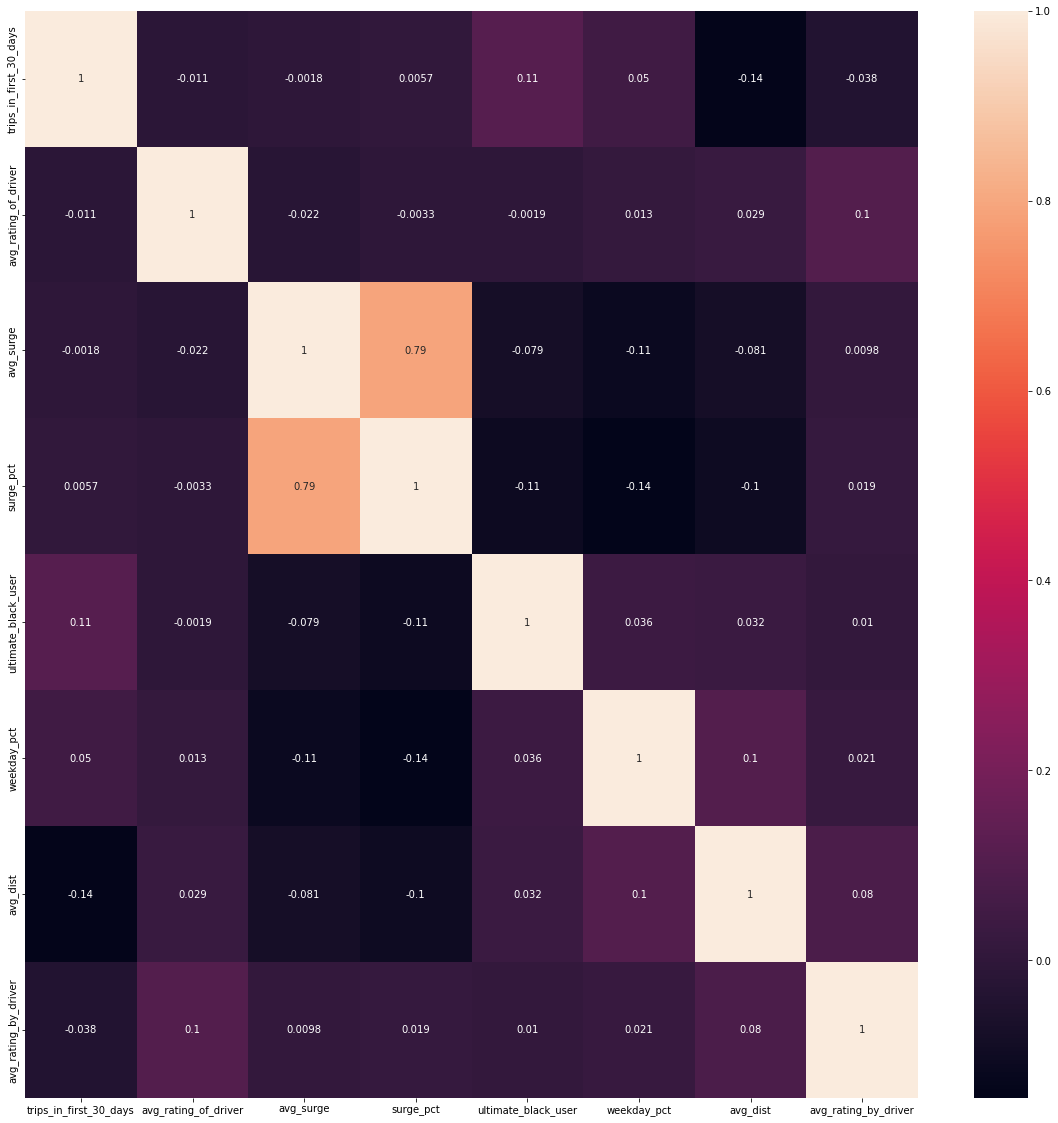

In [524]:
plt.figure(figsize=(20,20))
sns.heatmap(ultimate_data_challenge_df.corr(), annot=True)

In [538]:
ultimate_data_challenge_df.retained.value_counts()

not retained    31690
retained        18310
Name: retained, dtype: int64

In [550]:
print("retain rate: {}%".format(round(18310/(31690+18310)*100),2))

retain rate: 37%


We have to drop either avg_surge or surge_pct to feed the data into the model. (curse of dimension)

In [617]:
print(ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'retained']['weekday_pct'].mean())
print(ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'not retained']['weekday_pct'].mean())

62.21460404150747
60.18159671820749


In [615]:
print(ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'retained']['surge_pct'].mean())
ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'not retained']['surge_pct'].mean()

9.128164937192853


8.688548437992992

In [619]:
print(ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'retained']['avg_surge'].mean())
print(ultimate_data_challenge_df[ultimate_data_challenge_df['retained'] == 'not retained']['avg_surge'].mean())

1.073720371381775
1.075366677185244


So people who retained have 2.1% higher user trip occuring during weekday. They also have 0.5% more often trip rates with surge multiplier higher than 1.

Let's choose the features.

In [621]:
ultimate_data_challenge_df.dropna(inplace=True)

In [627]:
ultimate_data_challenge_df.drop(['avg_surge','signup_date','last_trip_date','phone','city','ultimate_black_user'],axis=1,inplace=True)

In [774]:
x = ultimate_data_challenge_df.drop(['retained'],axis=1)
y = ultimate_data_challenge_df['retained']

In [775]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=42)

In [776]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [777]:
x_train.shape

(26716, 6)

In [778]:
x_test.shape

(8349, 6)

In [779]:
x_val.shape

(6679, 6)

In [780]:
y_train.shape

(26716,)

In [723]:
y_test.shape

(8349,)

In [724]:
y_val.shape

(6679,)

The best way to find out the linearity is to either fit a linear line or run a logistic regression or SVM and check for residual errors. A higher error means the data is not linear and would need complex algorithms to fit.

In [782]:
column_names = x_train.columns

In [783]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import optuna
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss  


sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns = column_names)
x_test = pd.DataFrame(sc.fit_transform(x_test),columns = column_names)

In [784]:
y_train = y_train.map({'not retained':0, 'retained':1})
y_val = y_val.map({'not retained':0, 'retained':1})
y_test = y_test.map({'not retained':0, 'retained':1})

In [785]:
y_val

26712    0
771      1
13227    0
28671    0
26571    0
        ..
15635    0
46606    0
23000    0
17846    0
4607     0
Name: retained, Length: 6679, dtype: int64

In [804]:
def objective(trial):
    
    criterion = trial.suggest_categorical('criterion',['gini','entropy'])
    max_depth = trial.suggest_int('max_depth',15,50)
    min_samples_split = trial.suggest_int('min_samples_split',2,7)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes',2,50)
    
    

    dtc = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth,max_leaf_nodes=max_leaf_nodes)
    
    
    dtc.fit(
        x_train,
        y_train,
        
    )
    
    y_pred = dtc.predict(x_val)
    
    return f1_score(y_val,y_pred)
    
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2022-11-18 07:12:14,915] A new study created in memory with name: no-name-c4bb1fa6-82a8-4e3b-aad2-4f91525f753e
[I 2022-11-18 07:12:14,954] Trial 0 finished with value: 0.0 and parameters: {'criterion': 'entropy', 'max_depth': 47, 'min_samples_split': 4, 'max_leaf_nodes': 2}. Best is trial 0 with value: 0.0.
[I 2022-11-18 07:12:14,989] Trial 1 finished with value: 0.0 and parameters: {'criterion': 'entropy', 'max_depth': 49, 'min_samples_split': 6, 'max_leaf_nodes': 2}. Best is trial 0 with value: 0.0.
[I 2022-11-18 07:12:15,048] Trial 2 finished with value: 0.36647117722786443 and parameters: {'criterion': 'gini', 'max_depth': 49, 'min_samples_split': 6, 'max_leaf_nodes': 29}. Best is trial 2 with value: 0.36647117722786443.
[I 2022-11-18 07:12:15,103] Trial 3 finished with value: 0.36647117722786443 and parameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 4, 'max_leaf_nodes': 23}. Best is trial 2 with value: 0.36647117722786443.
[I 2022-11-18 07:12:15,161] Tri

Best Score: 0.36647117722786443
Best trial: {'criterion': 'gini', 'max_depth': 49, 'min_samples_split': 6, 'max_leaf_nodes': 29}


In [802]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth= 22, min_samples_split =5, max_leaf_nodes=6)
dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)
print("Training score : {}".format(dtc.score(x_train,y_train)))
print("f1 score : {}".format(f1_score(y_test,y_pred)))
print("Testing score : {}".format(dtc.score(x_test,y_test)))

Training score : 0.6974097918850127
f1 score : 0.6312263326536556
Testing score : 0.6967301473230327


In [ ]:
So I basically proved our data needs more complex model to use. 

Tt isn't overfitting but it isn't powerful. Let's try a more complex algorithm. We can try to build a randomforest model.

Resource: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d#:~:text=The%20most%20important%20hyper%2Dparameters,MSE%20or%20MAE%20for%20regression)

In [815]:
from sklearn.ensemble import RandomForestClassifier
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',100,150,200)
    criterion = trial.suggest_categorical('criterion',['gini','entropy'])
    max_depth = trial.suggest_float('max_depth',2,20)
    min_samples_split = trial.suggest_int('min_samples_split',2,10)
    max_features = trial.suggest_categorical('max_features',['sqrt','auto'])
    
    rfc = RandomForestClassifier(n_estimators = n_estimators, 
                                 criterion = criterion, 
                                 max_depth = max_depth, 
                                 min_samples_split=min_samples_split,
                                max_features = max_features)
    
    rfc.fit(
        x_train,
        y_train
    )
    
    return rfc.score(x_val,y_val)
    
    
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)
    

[I 2022-11-18 07:18:34,933] A new study created in memory with name: no-name-9398480b-107f-4cf3-ac5d-7799334ff7be
/Users/taehyun/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:683: UserWarning:

The distribution is specified by [100, 150] and step=200, but the range is not divisible by `step`. It will be replaced by [100, 100].

[I 2022-11-18 07:18:36,065] Trial 0 finished with value: 0.5410989669112143 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 4.510506242310852, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5410989669112143.
/Users/taehyun/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:683: UserWarning:

The distribution is specified by [100, 150] and step=200, but the range is not divisible by `step`. It will be replaced by [100, 100].

[I 2022-11-18 07:18:36,881] Trial 1 finished with value: 0.6021859559814343 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 2.

Best Score: 0.6021859559814343
Best trial: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 2.213061007806969, 'min_samples_split': 9, 'max_features': 'auto'}


In [817]:
rfc = RandomForestClassifier(n_estimators = 100, criterion ='gini', max_depth = 2.213, min_samples_split = 9, max_features = 'auto')
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2.213, min_samples_split=9)

In [818]:
print("Training score : {}".format(rfc.score(x_train,y_train)))
print("f1 score : {}".format(f1_score(y_test,y_pred)))
print("Testing score : {}".format(rfc.score(x_test,y_test)))

Training score : 0.7022757897888906
f1 score : 0.6312263326536556
Testing score : 0.7057132590729429


The score increased. 70% Accruacy! 

Now let's figure out the important features.

In [834]:
import time
import numpy as np

feature_names = [f"{i}" for i in x_train.columns]

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f}")
feature_names

Elapsed time to compute the importances: 0.016


['trips_in_first_30_days',
 'avg_rating_of_driver',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

<AxesSubplot:>

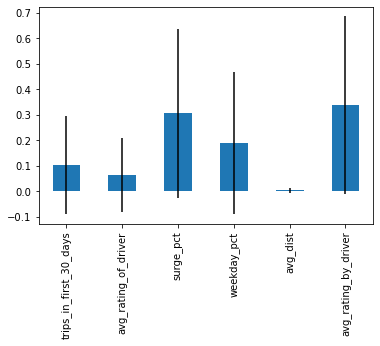

In [836]:
forest_importances = pd.Series(importances,index=feature_names)

fig,ax=plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)


In [828]:
[tree for tree in rfc.estimators_]

[DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=875527675),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=1740420618),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=29595622),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=446231239),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=526154502),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=1484508948),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
                        min_samples_split=9, random_state=562589856),
 DecisionTreeClassifier(max_depth=2.213, max_features='auto',
             